In [23]:
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt

In [33]:
!tree ..

..
├── 04-19 octobre
│   └── Graphes.ipynb
├── 2021 10 15 Analyses 1
│   ├── 2021 10 15 test-5m.csv
│   ├── PremierGraphe.ipynb
│   ├── Scraping.ipynb
│   ├── Scraping.py
│   ├── test-15-1.csv
│   ├── test-5m.csv:Zone.Identifier
│   ├── test.csv
│   ├── Velib01.png
│   └── Velib API.ipynb
├── 2021 10 17 Analyses 2
│   └── EDA 2021 10 17.ipynb
├── 2021 10 18
│   ├── Graphe.ipynb
│   ├── test-30m.csv
│   ├── test-30m.csv:Zone.Identifier
│   ├── Velib01.png
│   ├── Velib02.png
│   ├── Velib03.png
│   ├── Velib04.png
│   └── Velib05.png
├── Data
│   ├── 2021 10 17 30m.csv
│   ├── 2021 10 17 5m.csv
│   ├── 2021 10 19 30m.csv
│   ├── 2021 10 19 5m.csv
│   ├── test-30m10 19.csv:Zone.Identifier
│   └── test-5m 10 19.csv:Zone.Identifier
├── Scraping.py
├── test-30m-10-17.csv:Zone.Identifier
├── test-5m-10-17.csv:Zone.Identifier
└── test.csv

5 directories, 29 files


In [34]:
df = pd.read_csv('../Data/2021 10 19 30m.csv')
df

,datetime,stationCode,meca,elec,park
0,2021-10-15 00-15,16107,1,1,31
1,2021-10-15 00-15,11104,7,0,12
2,2021-10-15 00-15,9020,8,3,10
3,2021-10-15 00-15,12109,23,3,2
4,2021-10-15 00-15,5001,2,0,41
...,...,...,...,...,...
277803,2021-10-19 06-30,26009,0,0,0
277804,2021-10-19 06-30,17126,10,1,19
277805,2021-10-19 06-30,32012,3,1,31
277806,2021-10-19 06-30,21302,24,7,0


In [35]:
URL_VELIB_STATIONS = "https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_information.json"
def get_stations_df():
    response = requests.get(URL_VELIB_STATIONS)
    stations_df = (pd.DataFrame(response.json()["data"]["stations"])
                   .set_index("station_id"))
    return stations_df
stations_df = get_stations_df()
stations_df

,name,lat,lon,capacity,stationCode,rental_methods
station_id,,,,,,
213688169,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,16107,NaN
516709288,Charonne - Robert et Sonia Delauney,48.855908,2.392571,20,11104,NaN
36255,Toudouze - Clauzel,48.879296,2.337360,21,9020,[CREDITCARD]
37815204,Mairie du 12ème,48.840855,2.387555,30,12109,NaN
100769544,Harpe - Saint-Germain,48.851519,2.343670,46,5001,[CREDITCARD]
...,...,...,...,...,...,...
11437961617,Marcel Delorme - Pierre Brossolette,48.912061,2.295897,0,26009,NaN
11438049493,Hélène et François Missoffe - Emile Borel,48.899907,2.321544,32,17126,NaN
102335085,Aristide Briand - Place de la Résistance,48.821242,2.251100,25,21302,[CREDITCARD]


In [36]:
df["datetime"] = (pd.to_datetime(df["datetime"], format = '%Y-%m-%d %H-%M')
                  .dt.strftime("%d/%m %H:%M"))

In [37]:
pd.to_datetime("2021-10-15 00-15", format = '%Y-%m-%d %H-%M')

Timestamp('2021-10-15 00:15:00')

In [38]:
pd.Timestamp('2021-10-15 00:15:00')

Timestamp('2021-10-15 00:15:00')

In [39]:
# df = df[pd.to_datetime(df.datetime, format = "%d/%m %H:%M") > pd.Timestamp('2021-10-15 06:15:00')]

In [40]:
df.sample(5)

,datetime,stationCode,meca,elec,park
101227,16/10 17:00,41401,9,5,11
4422,15/10 07:30,5032,0,0,38
173172,17/10 18:00,20005,1,1,17
131310,17/10 03:30,11033,22,1,6
21460,15/10 13:00,9104,15,4,6


In [41]:
df_home = df[df.stationCode.isin([12008, 12009, 12106, 12011,])]

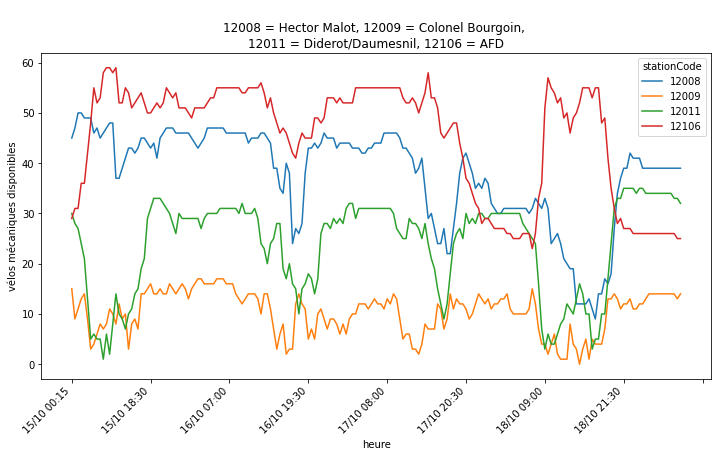

In [42]:
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot()
df_home.pivot_table(
    values="meca", 
    index="datetime", 
    columns="stationCode").plot(xlabel = "heure", 
                                ylabel = 'vélos mécaniques disponibles', 
                                ax = ax,
                                title = """
12008 = Hector Malot, 12009 = Colonel Bourgoin, 
12011 = Diderot/Daumesnil, 12106 = AFD""");
ax = plt.gca()
plt.setp(ax.get_xticklabels(), ha="right", rotation=45);

#plt.savefig("Velib01.png")

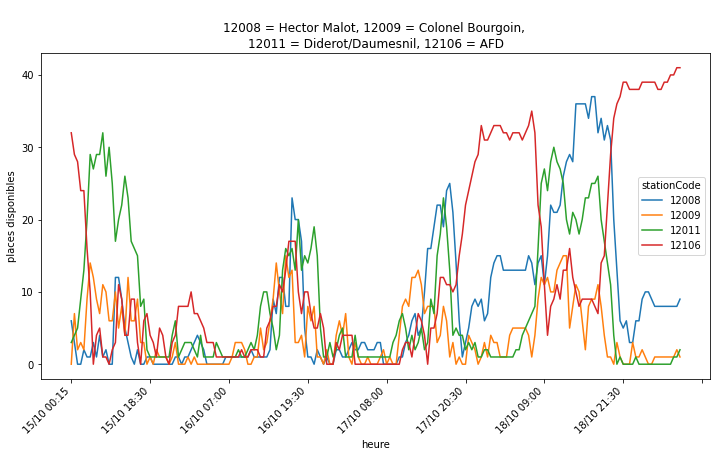

In [43]:
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot()
df_home.pivot_table(
    values="park", 
    index="datetime", 
    columns="stationCode").plot(xlabel = "heure", 
                                ylabel = 'places disponibles', 
                                ax = ax,
                                title = """
12008 = Hector Malot, 12009 = Colonel Bourgoin, 
12011 = Diderot/Daumesnil, 12106 = AFD""");
ax = plt.gca()
plt.setp(ax.get_xticklabels(), ha="right", rotation=45);

#plt.savefig("Velib01.png")

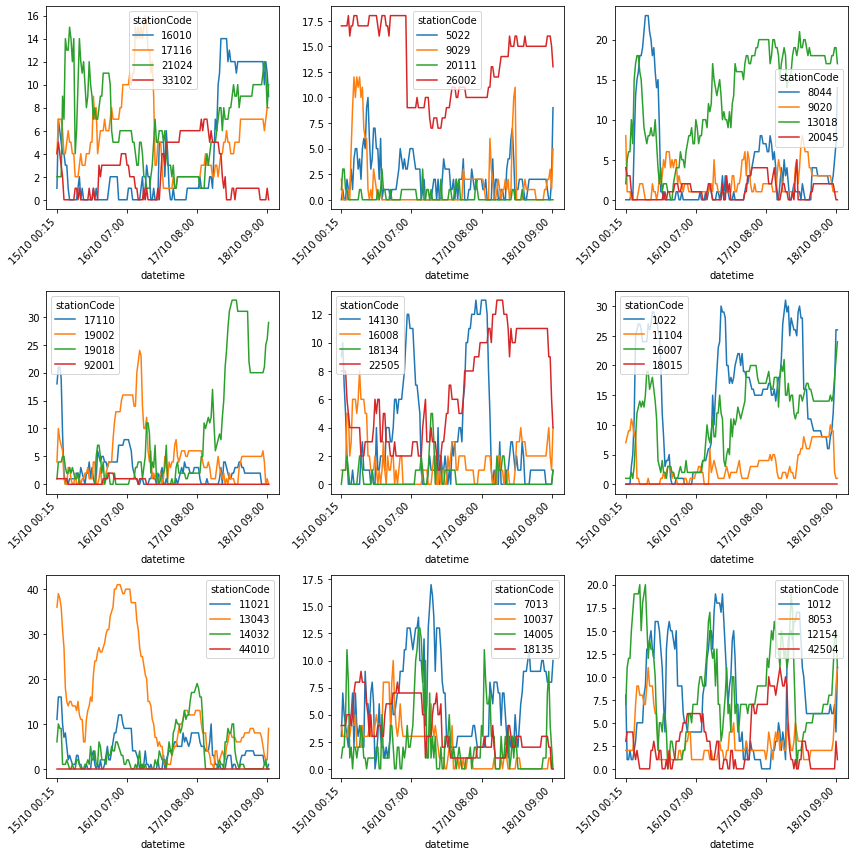

In [13]:
fig, axs = plt.subplots(3,3, figsize = (12, 12))
for ax in axs.flat:
    random_list = df.sample(4).stationCode.tolist()
    df_random = df[df.stationCode.isin(random_list)]
    df_random.pivot_table(
        values="meca", 
        index="datetime", 
        columns="stationCode").plot( 
                                    ax = ax,
                                    );
    

    plt.setp(ax.get_xticklabels(), ha="right", rotation=45);
plt.tight_layout()
plt.savefig("Velib05.png")